# Assignment2 - Supervised Learning flow

# Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

# student 1: Ziv Sharabi, 9685
# student 2: Jonatan Wallenstein, 4248

## Part 2 - Initial Preparations 

In [1]:
import pandas as pd 
import numpy as np
from sklearn.metrics import r2_score 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler,StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import warnings
from sklearn.metrics import mean_squared_error, mean_absolute_error

We load the train dataset and separate it.
X_train - df of the features
y_train - the value we need to predict

In [2]:
train_dataset_path = "housing_train.csv"
dataset_train = pd.read_csv(train_dataset_path)
dataset_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,4.0179,46.0,4.158690,1.032746,512.0,1.289673,34.07,-118.35,3.500
1,2.7002,6.0,4.149245,1.179989,4092.0,2.287311,34.05,-117.31,0.883
2,1.2762,17.0,3.432331,1.022556,1325.0,2.490602,34.42,-119.69,2.536
3,4.9342,23.0,5.735798,1.053201,4580.0,4.129847,34.04,-117.93,1.810
4,2.2755,21.0,4.064607,0.962079,2109.0,2.962079,32.58,-117.11,1.250
...,...,...,...,...,...,...,...,...,...
16507,6.0000,25.0,7.760599,1.084788,1098.0,2.738155,33.78,-118.05,3.535
16508,11.0138,16.0,7.306991,1.060790,868.0,2.638298,33.64,-117.81,4.421
16509,5.4675,32.0,6.169935,1.013072,1790.0,2.924837,37.26,-121.91,2.611
16510,1.6932,37.0,4.661972,1.107042,841.0,2.369014,38.54,-121.49,0.784


Desplay the outliers of all features

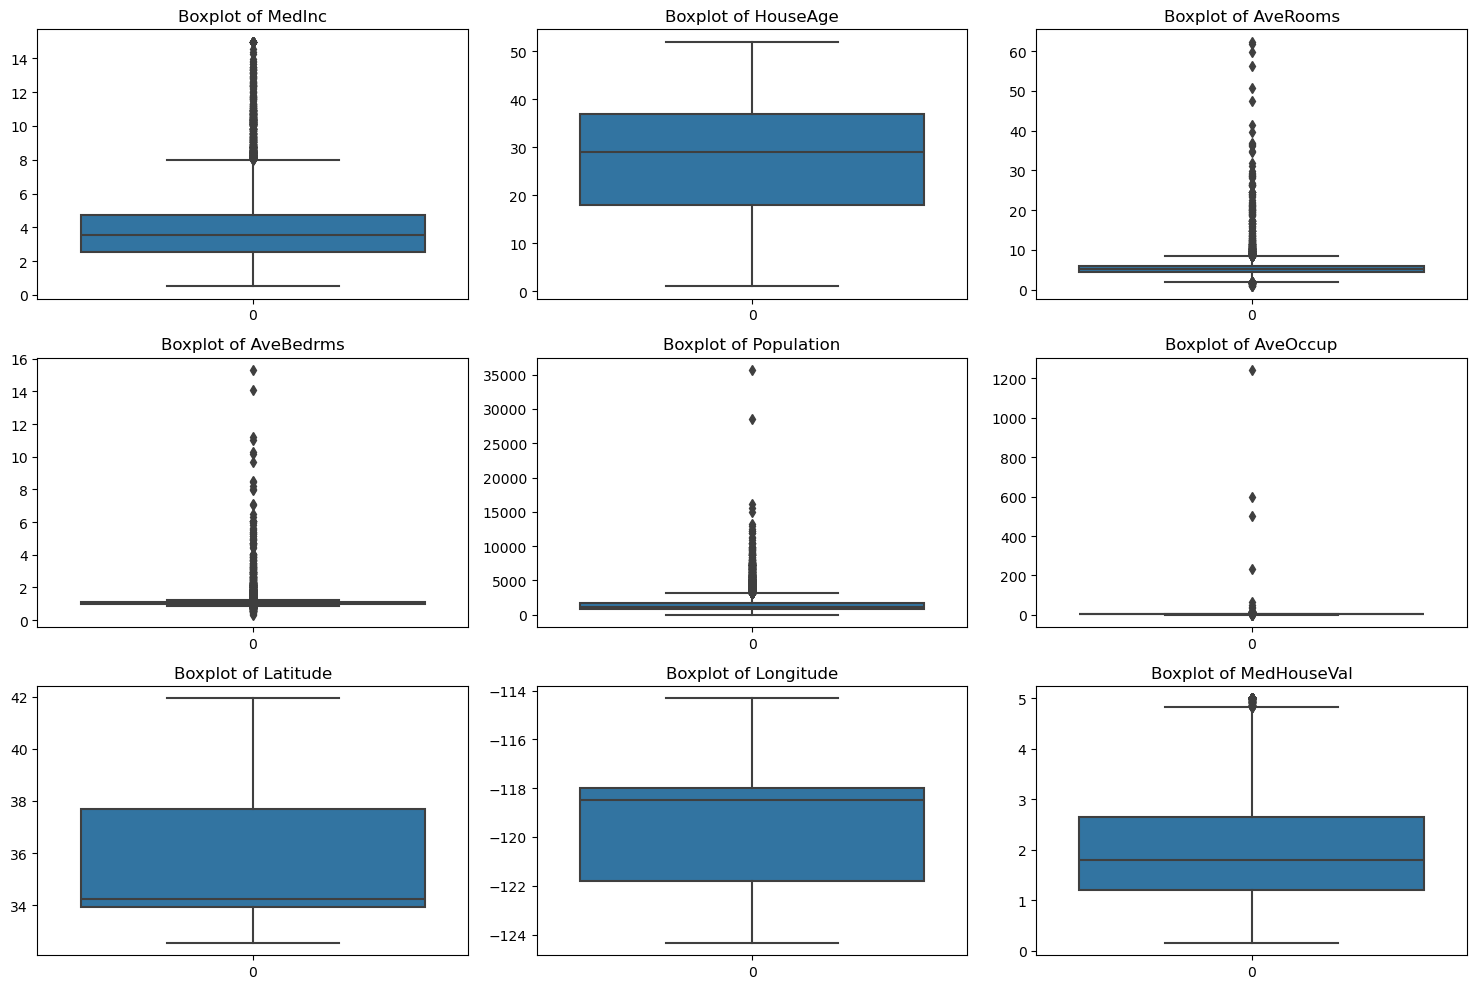

In [4]:
plt.figure(figsize=(15, 10))  # Adjust figure size based on the number of features
# Loop through each column to create boxplots
for i, column in enumerate(dataset_train.columns, 1):
    plt.subplot(3, 3, i)  # Adjust the grid size (3x3) to match the number of features
    sns.boxplot(dataset_train[column])
    plt.title(f'Boxplot of {column}')
    
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


Remove outliers

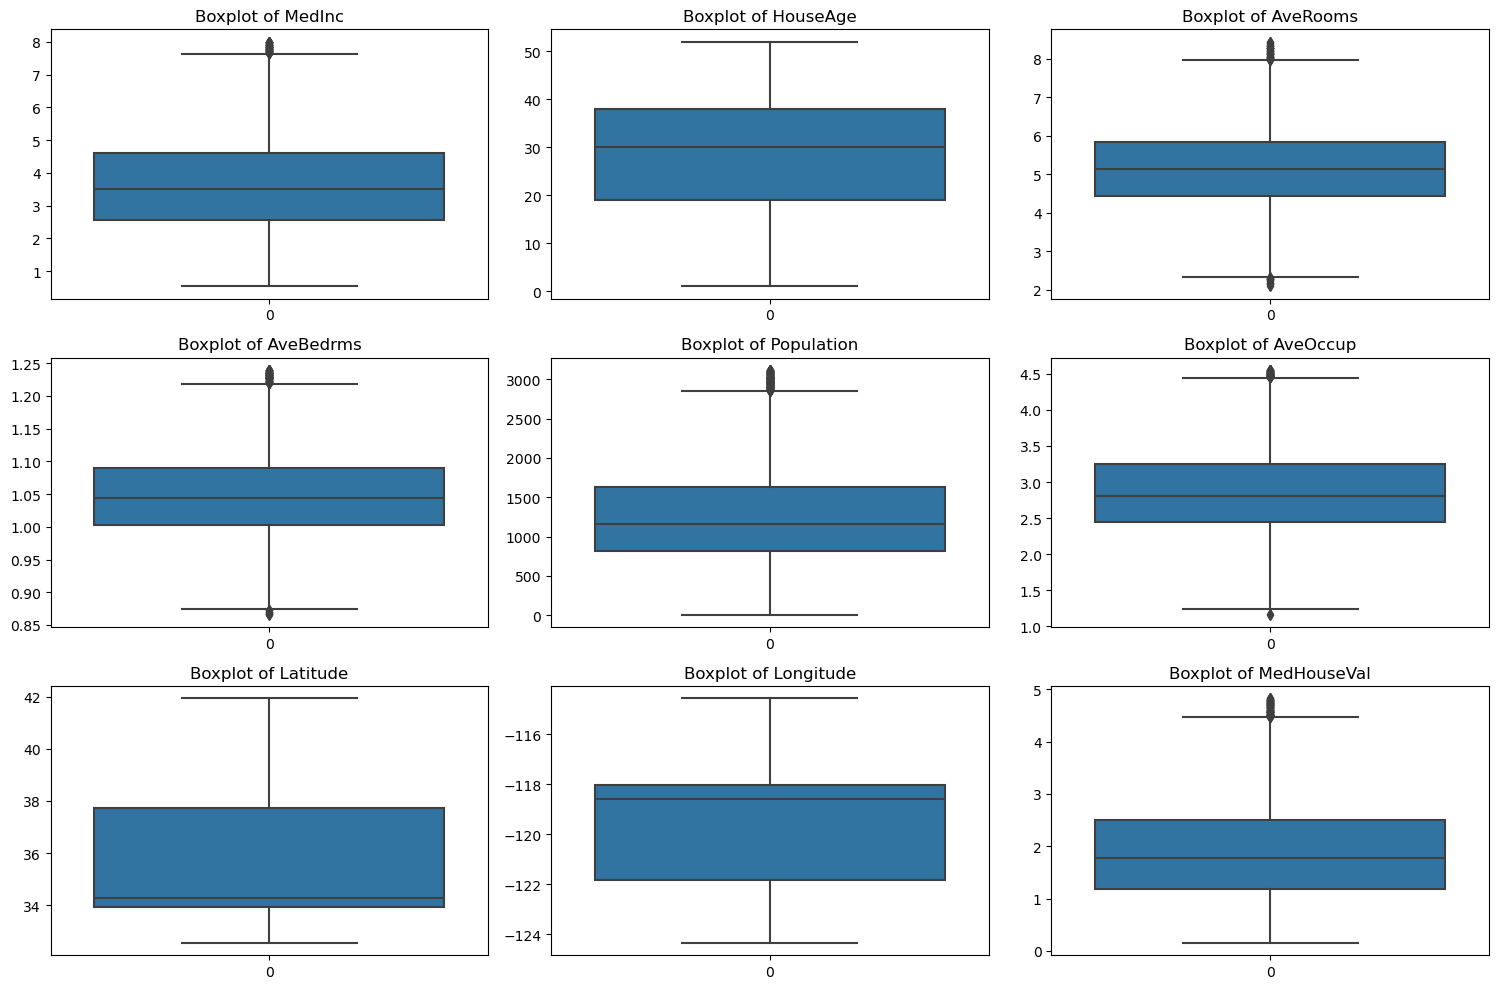

In [5]:
Q1 = dataset_train.quantile(0.25)

# Calculate Q3 (75th percentile) for each feature
Q3 = dataset_train.quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Filter the training set to remove outliers based on IQR
# Keep rows where all features fall within [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR]
dataset_train_clean = dataset_train[~((dataset_train < (Q1 - 1.5 * IQR)) | (dataset_train > (Q3 + 1.5 * IQR))).any(axis=1)]

plt.figure(figsize=(15, 10))  # Adjust figure size based on the number of features

# Loop through each column to create boxplots
for i, column in enumerate(dataset_train_clean.columns, 1):
    plt.subplot(3, 3, i)  # Adjust the grid size (3x3) to match the number of features
    sns.boxplot(dataset_train_clean[column])
    plt.title(f'Boxplot of {column}')
    
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


In [6]:
col_name = "MedHouseVal"
X_train =dataset_train_clean.drop(columns=[col_name])
y_train = dataset_train_clean[col_name]
X_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,4.0179,46.0,4.158690,1.032746,512.0,1.289673,34.07,-118.35
2,1.2762,17.0,3.432331,1.022556,1325.0,2.490602,34.42,-119.69
4,2.2755,21.0,4.064607,0.962079,2109.0,2.962079,32.58,-117.11
5,2.6875,17.0,4.518182,0.941818,1139.0,2.070909,37.62,-122.08
6,2.9375,29.0,5.281124,1.120482,926.0,3.718876,35.04,-120.47


#### We load the test dataset and separate it.X_test - df of the features. y_test - the value we need to predict

In [7]:
test_dataset_path = "housing_test.csv"
dataset_test = pd.read_csv(test_dataset_path)
X_test =dataset_test.drop(columns=[col_name])
y_test = dataset_test[col_name]
X_test.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,5.3254,32.0,5.786260,1.033079,982.0,2.498728,34.29,-119.27
1,5.3032,52.0,5.095745,1.028369,980.0,3.475177,34.08,-118.12
2,4.1679,41.0,6.617486,1.371585,915.0,2.500000,37.05,-122.05
3,3.6429,28.0,5.249180,1.009836,848.0,2.780328,38.69,-121.41
4,2.7457,17.0,11.183267,2.107570,675.0,2.689243,38.88,-119.99


In [8]:
dataset_train_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13058 entries, 0 to 16511
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       13058 non-null  float64
 1   HouseAge     13058 non-null  float64
 2   AveRooms     13058 non-null  float64
 3   AveBedrms    13058 non-null  float64
 4   Population   13058 non-null  float64
 5   AveOccup     13058 non-null  float64
 6   Latitude     13058 non-null  float64
 7   Longitude    13058 non-null  float64
 8   MedHouseVal  13058 non-null  float64
dtypes: float64(9)
memory usage: 1.5 MB


In [9]:
dataset_train.info() # no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       16512 non-null  float64
 1   HouseAge     16512 non-null  float64
 2   AveRooms     16512 non-null  float64
 3   AveBedrms    16512 non-null  float64
 4   Population   16512 non-null  float64
 5   AveOccup     16512 non-null  float64
 6   Latitude     16512 non-null  float64
 7   Longitude    16512 non-null  float64
 8   MedHouseVal  16512 non-null  float64
dtypes: float64(9)
memory usage: 1.1 MB


In [10]:
dataset_test.info() # no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4128 entries, 0 to 4127
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       4128 non-null   float64
 1   HouseAge     4128 non-null   float64
 2   AveRooms     4128 non-null   float64
 3   AveBedrms    4128 non-null   float64
 4   Population   4128 non-null   float64
 5   AveOccup     4128 non-null   float64
 6   Latitude     4128 non-null   float64
 7   Longitude    4128 non-null   float64
 8   MedHouseVal  4128 non-null   float64
dtypes: float64(9)
memory usage: 290.4 KB


In [11]:
dataset_train_clean.duplicated().sum()  # no duplicated in train

0

In [12]:
dataset_test.duplicated().sum()  # no duplicated in test

0

#### Below, we have a histograms of the features to show their distribution. Based on these plots, we can observe several important details for various columns. and we can see some features have high skew.Another thing is the scaling.

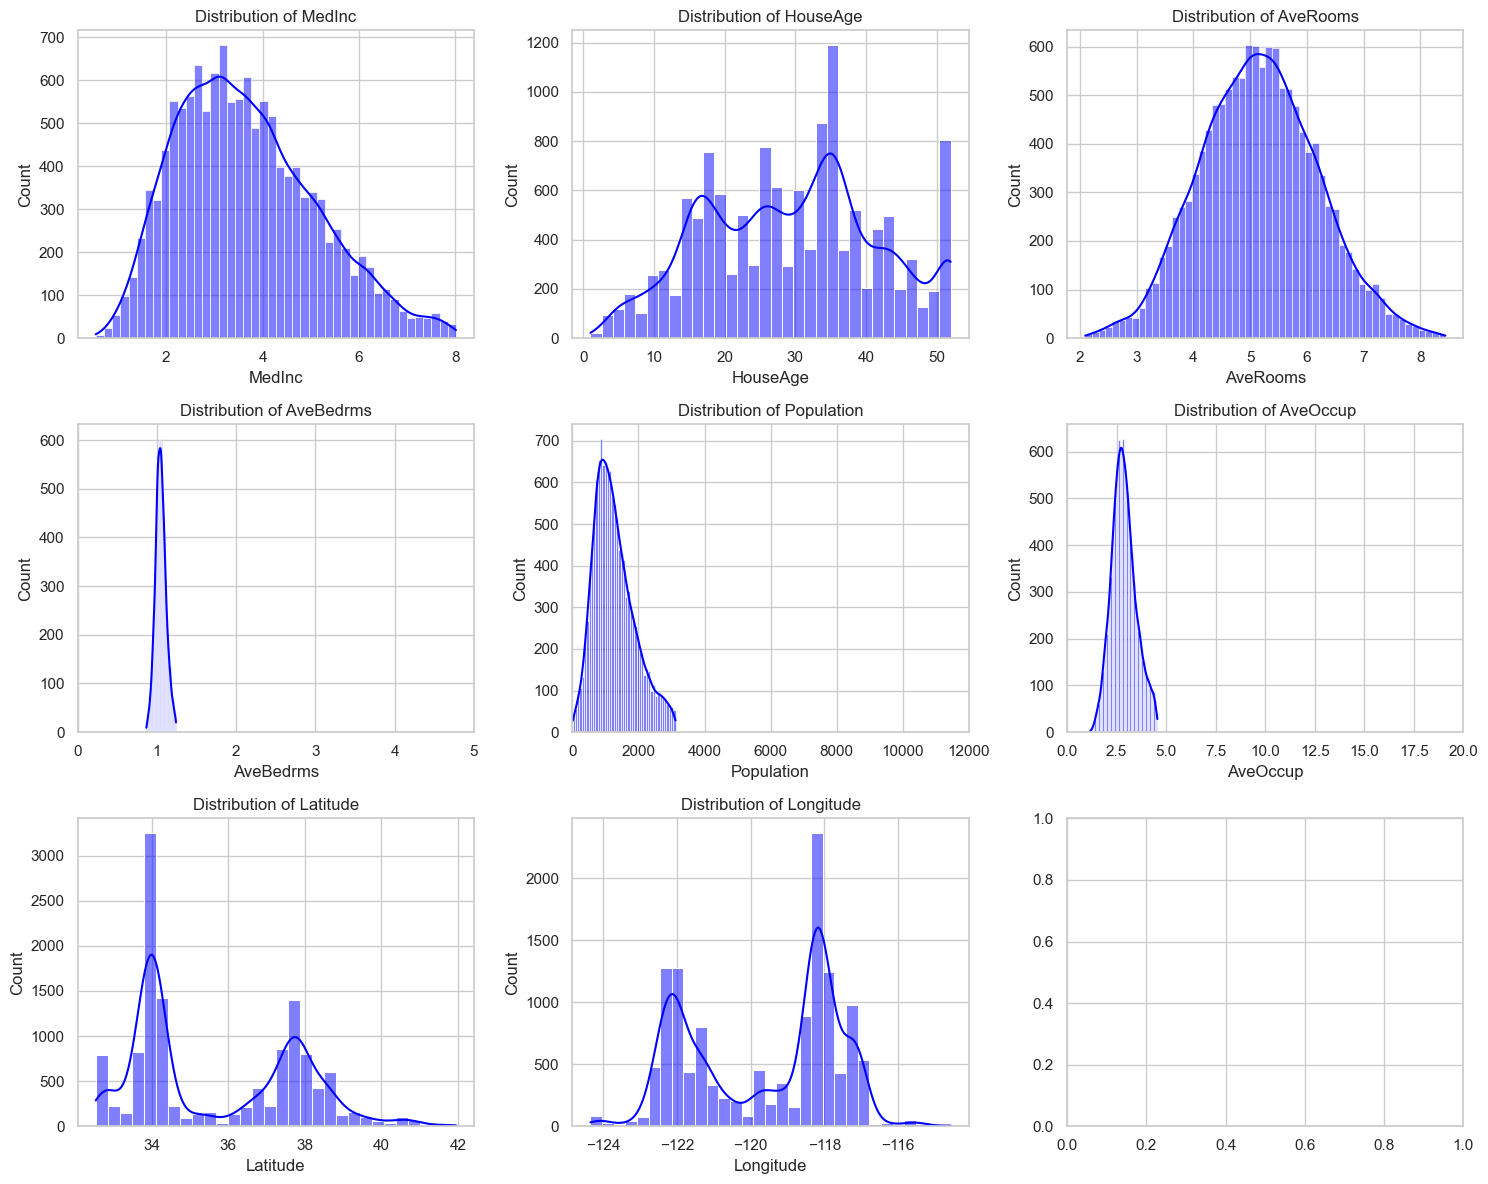

In [13]:
warnings.filterwarnings('ignore', category=FutureWarning)
dataset_train.replace([np.inf, -np.inf], np.nan, inplace=True)

sns.set(style="whitegrid")

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

columns = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

for i, col in enumerate(columns):
    sns.histplot(X_train[col], kde=True, ax=axes[i], color='blue')
    axes[i].set_title(f'Distribution of {col}')
    if col == 'AveOccup':
        axes[i].set_xlim(0, 20)
    if col == 'AveBedrms':
        axes[i].set_xlim(0, 5)
    if col == 'Population':
        axes[i].set_xlim(0, 12000)

plt.tight_layout()
plt.show()

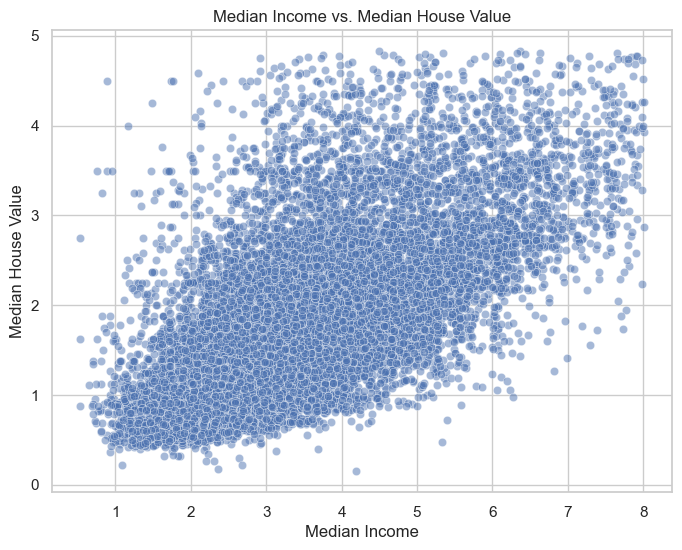

In [14]:
# 1. Scatter plot: Median Income vs. Median House Value
plt.figure(figsize=(8, 6))
sns.scatterplot(x='MedInc', y='MedHouseVal', data=dataset_train_clean, alpha=0.5)
plt.title('Median Income vs. Median House Value')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()

#### Below, we see a scatterplot of longitude vs latitude color coded with Median value, which is our target variable. Surprisingly enough, this scatter plot actually drew a map of California. Looking at this data, we can confirm couple ideas.

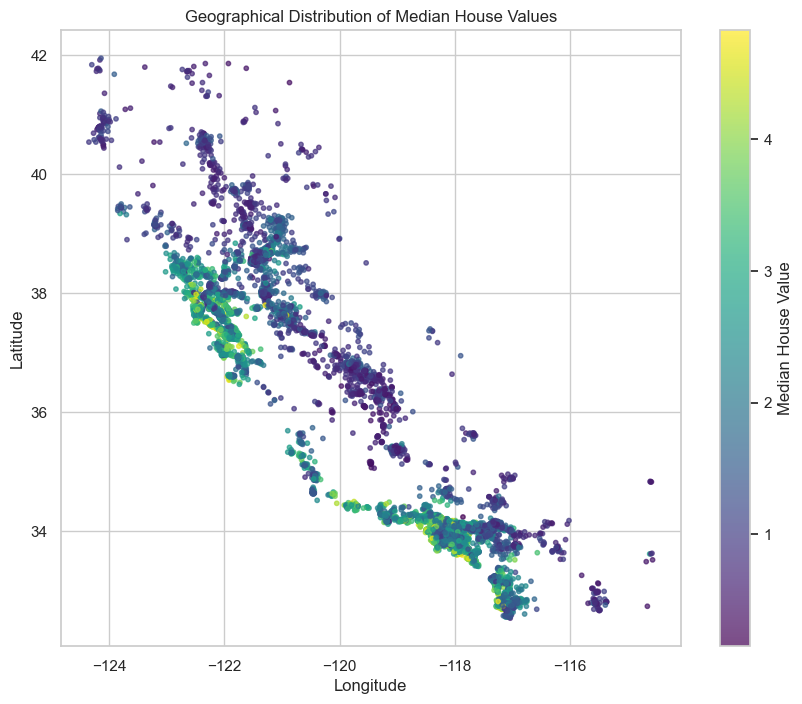

In [15]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(dataset_train_clean['Longitude'], dataset_train_clean['Latitude'], 
                      c=dataset_train_clean['MedHouseVal'], cmap='viridis', s=10, alpha=0.7)
plt.colorbar(scatter, label='Median House Value')
plt.title('Geographical Distribution of Median House Values')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [16]:
dataset_train_clean.corr()  #check the corralations between all features

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.175815,0.696125,-0.257486,-0.013632,-0.036103,-0.083114,-0.006396,0.631961
HouseAge,-0.175815,1.000000,-0.205730,-0.065418,-0.281237,-0.010557,0.002630,-0.088095,0.093332
AveRooms,0.696125,-0.205730,1.000000,-0.001819,-0.076061,0.055319,0.130153,-0.090622,0.257847
AveBedrms,-0.257486,-0.065418,-0.001819,1.000000,0.086873,-0.084739,0.036814,-0.008082,-0.095420
Population,-0.013632,-0.281237,-0.076061,0.086873,1.000000,0.200775,-0.101329,0.094345,-0.012499
AveOccup,-0.036103,-0.010557,0.055319,-0.084739,0.200775,1.000000,-0.159278,0.181604,-0.281646
Latitude,-0.083114,0.002630,0.130153,0.036814,-0.101329,-0.159278,1.000000,-0.933456,-0.156231
Longitude,-0.006396,-0.088095,-0.090622,-0.008082,0.094345,0.181604,-0.933456,1.000000,-0.037838
MedHouseVal,0.631961,0.093332,0.257847,-0.095420,-0.012499,-0.281646,-0.156231,-0.037838,1.000000


## Part 3 - Experiments

In [17]:
dataset_train_clean

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,4.0179,46.0,4.158690,1.032746,512.0,1.289673,34.07,-118.35,3.500
2,1.2762,17.0,3.432331,1.022556,1325.0,2.490602,34.42,-119.69,2.536
4,2.2755,21.0,4.064607,0.962079,2109.0,2.962079,32.58,-117.11,1.250
5,2.6875,17.0,4.518182,0.941818,1139.0,2.070909,37.62,-122.08,1.573
6,2.9375,29.0,5.281124,1.120482,926.0,3.718876,35.04,-120.47,1.448
...,...,...,...,...,...,...,...,...,...
16506,3.4514,38.0,3.821577,0.991701,1023.0,4.244813,34.25,-118.43,1.519
16507,6.0000,25.0,7.760599,1.084788,1098.0,2.738155,33.78,-118.05,3.535
16509,5.4675,32.0,6.169935,1.013072,1790.0,2.924837,37.26,-121.91,2.611
16510,1.6932,37.0,4.661972,1.107042,841.0,2.369014,38.54,-121.49,0.784


#### Defines a pipeline that combines Polynomial features,PCA and Ridge regression. Using GridSearch CV = 5. Finally present DF of all the combination with the hyperparameters and present it sorted by R2 score

In [25]:

pipeline_ridge = Pipeline([
    ('scaler', MinMaxScaler ()),                   # Scaling the features
    ('poly', PolynomialFeatures()),                 # Polynomial features
    ('pca', PCA()),                                 # PCA for dimensionality reduction
    ('ridge', Ridge())                              # Ridge Regression
])

# Parameter grid with feature engineering
param_grid_ridge = {
    'poly__degree': [1, 2, 3, 4],                   # Degree of polynomial features
    'poly__include_bias': [True, False],            # Include or exclude bias term
    'pca__n_components': [6, 7, None],              # Number of PCA components
    'ridge__alpha': [0.0001,0.001,0.01, 0.1],                 # Ridge regularization strength
    'ridge__max_iter': [500, 1000, 1500,2000]            # Maximum number of iterations for Ridge
}

# GridSearchCV with the pipeline and parameter grid
grid_search_ridge = GridSearchCV(pipeline_ridge, param_grid_ridge, cv=5, scoring='r2', n_jobs=-1)
grid_search_ridge.fit(X_train, y_train)

# Summary DataFrame
results_summary_ridge = pd.DataFrame(grid_search_ridge.cv_results_)[[
    'mean_test_score', 
    'param_poly__degree', 'param_pca__n_components', 'param_ridge__alpha', 
    'param_ridge__max_iter', 'param_poly__include_bias'
]]

# Sort by R² score
results_summary_ridge = results_summary_ridge.sort_values(by='mean_test_score', ascending=False)

# Rename columns for clarity
results_summary_ridge.columns = ['R2 Score', 'Polynomial Degree', 'PCA Components', 'Alpha (Ridge)', 'Max Iterations', 
                                  'Include Bias']

# Display the results
results_summary_ridge


,R2 Score,Polynomial Degree,PCA Components,Alpha (Ridge),Max Iterations,Include Bias
369,0.730649,4,None,0.0001,1000,False
368,0.730649,4,None,0.0001,500,False
371,0.730649,4,None,0.0001,2000,False
370,0.730649,4,None,0.0001,1500,False
352,0.730649,4,None,0.0001,500,True
...,...,...,...,...,...,...
112,0.420270,4,6,0.0001,500,False
98,0.420270,4,6,0.0001,1500,True
96,0.420270,4,6,0.0001,500,True
97,0.420270,4,6,0.0001,1000,True


#### This code sets up a machine learning pipeline that uses Polynomial Features, and a RandomForestRegressor for regression tasks. It applies GridSearch to optimize hyperparameters such as the degree of polynomial features, and RandomForest parameters . Evaluate using 5-fold cross-validation, scoring based on R2. The results sorted by R2 scores, and the best-performing hyperparameter combinations are identified.

In [22]:
from sklearn.feature_selection import SelectKBest, f_regression

pipeline = Pipeline([
    ('scaler', StandardScaler()),  # standard scaling
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),  # polynomial features
    ('feature_selection', SelectKBest(score_func=f_regression, k=5)),  # feature selection
    ('rf', RandomForestRegressor(random_state=42))  # random Forest
])

# Define the parameter grid
param_grid = {
    'poly__degree': [1,2, 3],  # polynomial features degree
    'feature_selection__k': [5, 6,'all'],  # number of features to select
    'rf__n_estimators': [50,100,150],  # number of trees in the forest
    'rf__max_depth': [None, 10, 20, 30]  # maximum depth of the trees
}

# perform GridSearch with the pipeline
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Results Summary DataFrame
results_summary_forest = pd.DataFrame(grid_search.cv_results_)[[
    'mean_test_score', 
    'param_poly__degree', 
    'param_feature_selection__k', 
    'param_rf__n_estimators', 
    'param_rf__max_depth'
]]

# sort by R2 score
results_summary_forest = results_summary_forest.sort_values(by='mean_test_score', ascending=False)

# rename columns
results_summary_forest.columns = ['R² Score', 'Polynomial Degree', 'K Best Features', 
                            'Number of Estimators', 'Max Depth']

# display
results_summary_forest

,R² Score,Polynomial Degree,K Best Features,Number of Estimators,Max Depth
83,0.773620,1,all,150,30
74,0.773519,1,all,150,None
80,0.773478,1,all,150,20
82,0.772620,1,all,100,30
79,0.772603,1,all,100,20
...,...,...,...,...,...
22,0.517091,2,5,100,30
13,0.516920,2,5,100,None
18,0.514009,2,5,50,20
21,0.512633,2,5,50,30


#### Do the same thing but with GradientBoostingRegressor.  GradientBoostingRegressor- used for regression tasks. It builds multiple weak learners ,each new tree corrects the errors made by the previous ones, improving the overall prediction. The model minimizes a loss function, such as mean squared error, by combining the predictions of all trees to make a more accurate final prediction


In [23]:

# define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),                      # feature scaling
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),  # polynomial features
    ('gb', GradientBoostingRegressor(random_state=42))  # gradient Boosting Regressor
])

# define the parameter grid
param_grid = {
    'poly__degree': [1,2, 3,4],                 # degree of polynomial features
    'gb__n_estimators': [100, 200, 300],    # number of boosting stages
    'gb__learning_rate': [0.01, 0.1, 0.2]   # learning rate
}

# Perform GridSearch with the pipeline and parameter grid
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# results Summary DataFrame
results_summary_gb = pd.DataFrame(grid_search.cv_results_)[[
    'mean_test_score', 
    'param_poly__degree', 
    'param_gb__n_estimators', 
    'param_gb__learning_rate'
]]

# sort by R2 score
results_summary_gb = results_summary_gb.sort_values(by='mean_test_score', ascending=False)

# rename columns
results_summary_gb.columns = ['R2 Score', 'Polynomial Degree', 
                            'Number of Estimators', 'Learning Rate']

# display the results
results_summary_gb


,R2 Score,Polynomial Degree,Number of Estimators,Learning Rate
33,0.810355,2,300,0.2
32,0.806594,1,300,0.2
34,0.804981,3,300,0.2
29,0.804625,2,200,0.2
21,0.801746,2,300,0.1
28,0.801576,1,200,0.2
35,0.801003,4,300,0.2
30,0.800363,3,200,0.2
22,0.798391,3,300,0.1
31,0.797806,4,200,0.2


In [26]:
# comparison of best R2 scores from the models
best_ridge_r2 = results_summary_ridge.iloc[0]['R2 Score']
best_forest_r2 = results_summary_forest.iloc[0]['R² Score']
best_gbr_r2 = results_summary_gb.iloc[0]['R2 Score']

# find best model
if best_ridge_r2 > best_forest_r2 and best_ridge_r2 > best_gbr_r2:
    # best model is Ridge Regression
    best_params_dict = results_summary_ridge.iloc[0].to_dict()
    best_pipeline = Pipeline([
        ('scaler', MinMaxScaler()),  # Scaling
        ('poly', PolynomialFeatures(degree=best_params_dict['Polynomial Degree'], 
                                    include_bias=best_params_dict['Include Bias'])),
        ('pca', PCA(n_components=best_params_dict['PCA Components'])),
        ('ridge', Ridge(alpha=best_params_dict['Alpha (Ridge)'], 
                        max_iter=best_params_dict['Max Iterations']))
    ])
    print("Best Model: Ridge Regression")

elif best_forest_r2 > best_ridge_r2 and best_forest_r2 > best_gbr_r2:
    # best model is RandomForest
    best_params_dict = results_summary_forest.iloc[0].to_dict()
    best_pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Scaling
        ('poly', PolynomialFeatures(degree=best_params_dict['Polynomial Degree'], 
                                    include_bias=False)),  # No bias in RandomForest
        ('feature_selection', SelectKBest(score_func=f_regression, k=best_params_dict['K Best Features'])),
        ('rf', RandomForestRegressor(n_estimators=best_params_dict['Number of Estimators'], 
                                     max_depth=best_params_dict['Max Depth']))
    ])
    print("Best Model: RandomForest")

else:
    # best model is GradientBoosting
    best_params_dict = results_summary_gb.iloc[0].to_dict()
    best_pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Scaling
        ('poly', PolynomialFeatures(degree=best_params_dict['Polynomial Degree'], 
                                    include_bias=False)),  # No bias in GradientBoosting
        ('gb', GradientBoostingRegressor(n_estimators=best_params_dict['Number of Estimators'], 
                                         learning_rate=best_params_dict['Learning Rate']))
    ])
    print("Best Model: GradientBoosting")

# output the best pipeline
print("Best Pipeline:", best_pipeline)


Best Model: GradientBoosting
Best Pipeline: Pipeline(steps=[('scaler', StandardScaler()),
                ('poly', PolynomialFeatures(include_bias=False)),
                ('gb',
                 GradientBoostingRegressor(learning_rate=0.2,
                                           n_estimators=300))])


## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [28]:
# fit the best pipeline on the training data
best_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('poly', PolynomialFeatures(include_bias=False)),
                ('gb',
                 GradientBoostingRegressor(learning_rate=0.2,
                                           n_estimators=300))])

## Part 5 - Apply on test and show model performance estimation

#### The results from the prediction beside y_test

In [32]:
#comparison between y_test and y_prediction
y_test_pred = best_pipeline.predict(X_test)
y_test = y_test.squeeze()
results_test_df = pd.DataFrame({
    'y_test': y_test,
    'y_test_pred': y_test_pred
})
results_test_df.head(10)

,y_test,y_test_pred
0,3.852,3.020228
1,2.457,2.332158
2,2.013,2.560685
3,1.052,1.201238
4,1.078,1.701462
5,0.580,0.553255
6,3.750,1.213022
7,1.135,1.259659
8,1.568,1.366068
9,1.917,2.108061


#### The Evaluation of the best pipeline

In [33]:

# calculate R2 score
r2_test = r2_score(y_test, y_test_pred)

# calculate Mean Squared Error
mse_test = mean_squared_error(y_test, y_test_pred)

# calculate Root Mean Squared Error
rmse_test = mse_test**0.5

# calculate Mean Absolute Error
mae_test = mean_absolute_error(y_test, y_test_pred)

model_quality_df = pd.DataFrame({
    'Metric': ['R² Score', 'Mean Squared Error (MSE)', 'Root Mean Squared Error (RMSE)', 'Mean Absolute Error (MAE)'],
    'Value': [r2_test, mse_test, rmse_test, mae_test]
})

model_quality_df

,Metric,Value
0,R² Score,0.808015
1,Mean Squared Error (MSE),0.260454
2,Root Mean Squared Error (RMSE),0.510347
3,Mean Absolute Error (MAE),0.334367


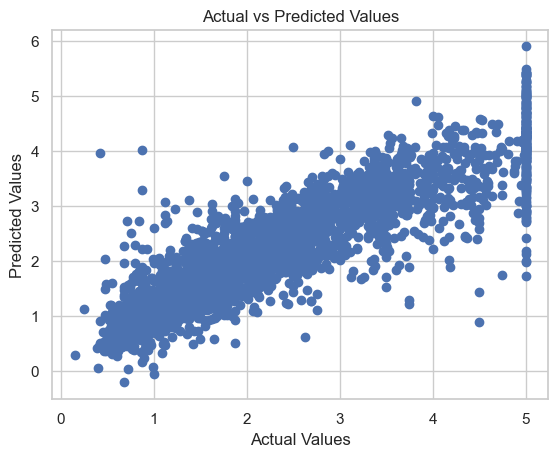

In [34]:
plt.scatter(y_test, y_test_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()